In [1]:
import tensorflow as tf

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense


In [5]:
seq_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [6]:
seq_model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Functional Layer

In [7]:
from tensorflow.keras.layers import Input

In [8]:
input = Input(shape=(28, 28))

In [9]:
x = Flatten()(input)
x = Dense(64, activation='relu')(x)
preds = Dense(10, activation = 'softmax')(x)

In [12]:
from tensorflow.keras.models import Model

In [13]:
func_model = Model(inputs=input, outputs=preds)

In [15]:
func_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
func_model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Branchine model

In [19]:
from tensorflow.keras.layers import Concatenate

In [20]:
layer1 = Dense(32)(input)
layer2_1 = Dense(32)(layer1)
layer2_2 = Dense(32)(layer1)
layer2_3 = Dense(32)(layer1)
merge = Concatenate([layer2_1, layer2_2, layer2_3])

building the model from my screenshot

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model

In [2]:
def format_output(data):
    y1 = data.pop('Y1')
    y1 = np.array(y1)
    y2 = data.pop('Y2')
    y2 = np.array(y2)
    return y1, y2


def norm(x):
    return (x - train_stats['mean']) / train_stats['std']


def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

In [4]:
# Specify data URI
URI = './Labs/data/ENB2012_data.xlsx'

# Use pandas excel reader
df = pd.read_excel(URI)
df = df.sample(frac=1).reset_index(drop=True)


# Split the data into train and test with 80 train / 20 test
train, test = train_test_split(df, test_size=0.2)
train_stats = train.describe()


# Get Y1 and Y2 as the 2 outputs and format them as np arrays
train_stats.pop('Y1')
train_stats.pop('Y2')
train_stats = train_stats.transpose()

train_Y = format_output(train)
test_Y = format_output(test)

# Normalize the training and test data
norm_train_X = norm(train)
norm_test_X = norm(test)

In [10]:
input_layer = Input(shape=(len(train .columns), ), name="InputLayer")

In [11]:
dense_3 = Dense(128, activation='relu', name='dense_1')(input_layer)
dense_4 = Dense(128, activation='relu', name='dense_name')(dense_3)


In [12]:
y1_output = Dense(1, name='y1_output')(dense_4)

In [15]:
dense_5 = Dense(64, activation='relu', name='dense_5')(dense_4)
y2_output = Dense(1, name = 'y2_output')(dense_5)


In [16]:
from tensorflow.keras.models import Model
model = Model(inputs=input_layer, outputs=[y1_output, y2_output])

In [17]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 InputLayer (InputLayer)     [(None, 8)]                  0         []                            
                                                                                                  
 dense_1 (Dense)             (None, 128)                  1152      ['InputLayer[0][0]']          
                                                                                                  
 dense_name (Dense)          (None, 128)                  16512     ['dense_1[0][0]']             
                                                                                                  
 dense_5 (Dense)             (None, 64)                   8256      ['dense_name[0][0]']          
                                                                                            

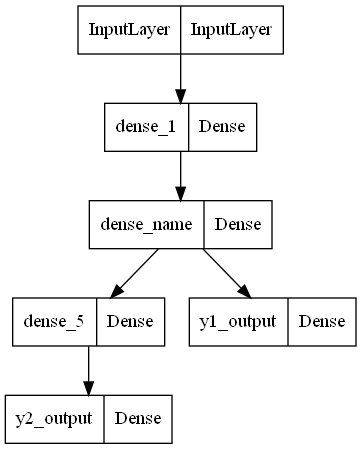

In [18]:
plot_model(model)

In [23]:
model.compile(
    loss={
        'y1_output':'mse',
        'y2_output':'mse'
    },
    metrics={
        'y1_output':tf.keras.metrics.RootMeanSquaredError(),
        'y2_output':tf.keras.metrics.RootMeanSquaredError()
    },
    optimizer='adam'
)

In [24]:
model.fit(norm_train_X, train_Y, epochs=100, batch_size=20)

Epoch 1/100
31/31 [==============================] - 5s 14ms/step - loss: 1.1953 - y1_output_loss: 0.2947 - y2_output_loss: 0.9006 - y1_output_root_mean_squared_error: 0.5428 - y2_output_root_mean_squared_error: 0.9490
Epoch 2/100
31/31 [==============================] - 0s 12ms/step - loss: 0.8437 - y1_output_loss: 0.1936 - y2_output_loss: 0.6502 - y1_output_root_mean_squared_error: 0.4399 - y2_output_root_mean_squared_error: 0.8063
Epoch 3/100
31/31 [==============================] - 0s 10ms/step - loss: 0.6384 - y1_output_loss: 0.1639 - y2_output_loss: 0.4745 - y1_output_root_mean_squared_error: 0.4049 - y2_output_root_mean_squared_error: 0.6888
Epoch 4/100
31/31 [==============================] - 0s 14ms/step - loss: 0.6479 - y1_output_loss: 0.1637 - y2_output_loss: 0.4842 - y1_output_root_mean_squared_error: 0.4046 - y2_output_root_mean_squared_error: 0.6958
Epoch 5/100
31/31 [==============================] - 0s 9ms/step - loss: 0.6273 - y1_output_loss: 0.1541 - y2_output_loss: 0

Multi Input Model

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Lambda
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFont, ImageDraw
import random

In [28]:
def create_pairs(x, digit_indices):
    '''Positive and negative pair creation.
    Alternates between positive and negative pairs.
    '''
    pairs = []
    labels = []
    n = min([len(digit_indices[d]) for d in range(10)]) - 1
    
    for d in range(10):
        for i in range(n):
            z1, z2 = digit_indices[d][i], digit_indices[d][i + 1]
            pairs += [[x[z1], x[z2]]]
            inc = random.randrange(1, 10)
            dn = (d + inc) % 10
            z1, z2 = digit_indices[d][i], digit_indices[dn][i]
            pairs += [[x[z1], x[z2]]]
            labels += [1, 0]
            
    return np.array(pairs), np.array(labels)


def create_pairs_on_set(images, labels):
    
    digit_indices = [np.where(labels == i)[0] for i in range(10)]
    pairs, y = create_pairs(images, digit_indices)
    y = y.astype('float32')
    
    return pairs, y


def show_image(image):
    plt.figure()
    plt.imshow(image)
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [29]:
# load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# prepare train and test sets
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# normalize values
train_images = train_images / 255.0
test_images = test_images / 255.0

# create pairs on train and test sets
tr_pairs, tr_y = create_pairs_on_set(train_images, train_labels)
ts_pairs, ts_y = create_pairs_on_set(test_images, test_labels)

In [65]:
def init_base_model():
    input_layer = Input(shape=(28, 28,), name='base_input')
    flatten_input = Flatten(name='flatten_input')(input_layer)
    first_dense = Dense(128, activation='relu', name='first_base_dense')(flatten_input)
    first_dropout = Dropout(0.1, name='first_dropout')(first_dense)
    second_dense = Dense(128, activation='relu', name='second_base_dense')(first_dropout)
    second_dropout = Dropout(0.1, name='second_dropout')(second_dense)
    third_dense = Dense(128, activation='relu', name='third_base_dense')(second_dropout)
    
    base_model = Model(inputs=input_layer, outputs=third_dense)
    return base_model 
    
    

In [54]:
base_model = init_base_model()

In [55]:
base_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base_input (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 flatten_input (Flatten)     (None, 784)               0         
                                                                 
 first_base_dense (Dense)    (None, 128)               100480    
                                                                 
 first_dropout (Dropout)     (None, 128)               0         
                                                                 
 second_base_dense (Dense)   (None, 128)               16512     
                                                                 
 second_dropout (Dropout)    (None, 128)               0         
                                                                 
 third_base_dense (Dense)    (None, 128)               1651

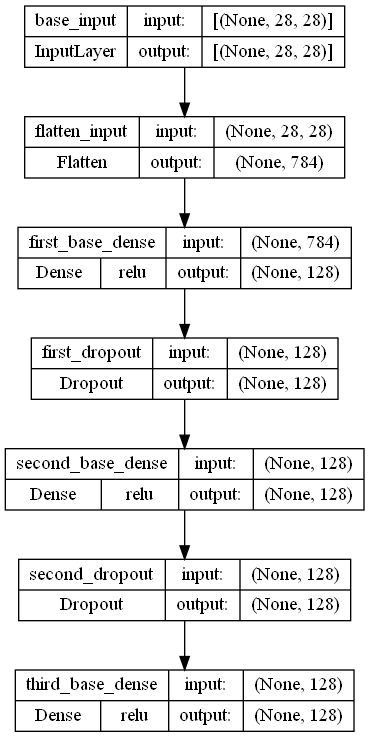

In [56]:
plot_model(base_model, show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [66]:
left_input = Input(shape=(28,28,), name ='left_input')
left_model = base_model(left_input)

right_input = Input(shape=(28,28,), name ='right_input')
right_model = base_model(right_input)

In [58]:
def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

In [67]:
euc_dist = Lambda(euclidean_distance, name='output_layer', output_shape=eucl_dist_output_shape)([left_model, right_model])

In [68]:
final_model = Model([left_input, right_input], euc_dist)

In [69]:
final_model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 left_input (InputLayer)     [(None, 28, 28)]             0         []                            
                                                                                                  
 right_input (InputLayer)    [(None, 28, 28)]             0         []                            
                                                                                                  
 model_5 (Functional)        (None, 128)                  133504    ['left_input[0][0]',          
                                                                     'right_input[0][0]']         
                                                                                                  
 output_layer (Lambda)       (None, 1)                    0         ['model_5[2][0]',       

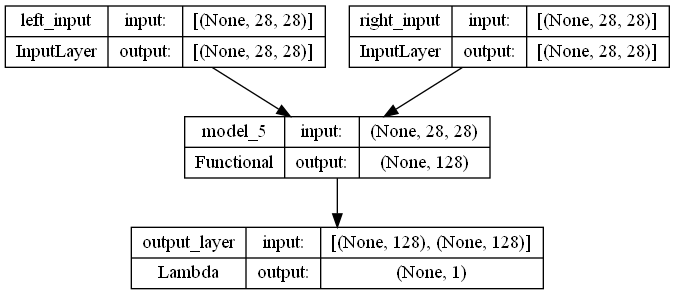

In [70]:
plot_model(final_model, show_layer_names=True, show_shapes=True, show_layer_activations=True)

In [71]:
def contrastive_loss_with_margin(margin):
    def contrastive_loss(y_true, y_pred):
        '''Contrastive loss from Hadsell-et-al.'06
        http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
        '''
        square_pred = K.square(y_pred)
        margin_square = K.square(K.maximum(margin - y_pred, 0))
        return (y_true * square_pred + (1 - y_true) * margin_square)
    return contrastive_loss

In [74]:
rms = RMSprop()
final_model.compile(loss=contrastive_loss_with_margin(margin=1), optimizer=rms)
history = final_model.fit([tr_pairs[:,0], tr_pairs[:,1]], tr_y, epochs=20, batch_size=128, validation_data=([ts_pairs[:,0], ts_pairs[:,1]], ts_y))

Epoch 1/20
938/938 [==============================] - 35s 19ms/step - loss: 0.1316 - val_loss: 0.0937
Epoch 2/20
938/938 [==============================] - 22s 24ms/step - loss: 0.0918 - val_loss: 0.0835
Epoch 3/20
938/938 [==============================] - 18s 19ms/step - loss: 0.0826 - val_loss: 0.0776
Epoch 4/20
938/938 [==============================] - 13s 13ms/step - loss: 0.0768 - val_loss: 0.0744
Epoch 5/20
938/938 [==============================] - 10s 11ms/step - loss: 0.0722 - val_loss: 0.0692
Epoch 6/20
938/938 [==============================] - 8s 9ms/step - loss: 0.0691 - val_loss: 0.0670
Epoch 7/20
938/938 [==============================] - 8s 9ms/step - loss: 0.0676 - val_loss: 0.0698
Epoch 8/20
938/938 [==============================] - 9s 9ms/step - loss: 0.0659 - val_loss: 0.0662
Epoch 9/20
938/938 [==============================] - 8s 9ms/step - loss: 0.0645 - val_loss: 0.0659
Epoch 10/20
938/938 [==============================] - 8s 9ms/step - loss: 0.0635 - val_lo